In [176]:
!pip install -r requirements.txt

In [177]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [178]:
#Dataset import
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [179]:
#Show train dataset
train

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,1725,15612627,Ozuluonye,627,Germany,Male,29,5,139541.58,2,1,0,80607.33
1,0,5731,15577683,Maclean,539,France,Female,29,4,0.00,2,1,1,100919.19
2,0,5074,15800295,Cruz,644,Germany,Male,34,9,112746.54,2,0,0,141230.07
3,0,4636,15761024,Long,619,France,Female,33,2,167733.51,2,1,1,65222.48
4,0,9628,15689322,Bevan,641,Spain,Male,31,3,153316.14,1,1,0,59927.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0,3023,15678168,Gibson,648,Spain,Female,27,7,0.00,2,1,1,163060.43
6396,0,3485,15643679,Goliwe,784,Germany,Male,28,2,70233.74,2,1,1,179252.73
6397,0,9349,15807239,Lung,664,France,Female,34,7,93920.47,1,0,0,179913.98
6398,0,4136,15789874,Wang,712,France,Female,29,3,87375.78,2,0,0,166194.53


In [180]:
#Show test dataset
test

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,2915,15733883,Ward,604,France,Male,28,7,0.00,2,0,0,58595.64
1,0,8983,15627971,Coates,504,France,Female,32,8,206663.75,1,0,0,16281.94
2,1,6319,15686835,Crawford,738,Germany,Female,57,9,148384.64,1,0,0,155047.11
3,0,2683,15732102,Darling,656,Germany,Female,27,3,150905.03,2,1,0,16998.72
4,1,1918,15699772,Barclay,428,Germany,Female,40,3,129248.11,2,1,0,72876.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,827,15660535,Avent,680,France,Female,47,5,0.00,2,1,1,179843.33
1596,0,5066,15775709,Nucci,832,France,Female,27,10,98590.25,1,1,0,30912.89
1597,0,8390,15715345,Sergeyeva,743,Spain,Male,25,6,0.00,2,1,0,129740.11
1598,0,4844,15736254,Ch'ang,654,France,Male,29,2,91955.61,1,1,0,37065.66


Iniziamo osservando che solo il 20% dei customers scelgono di lasciare la propria banca.

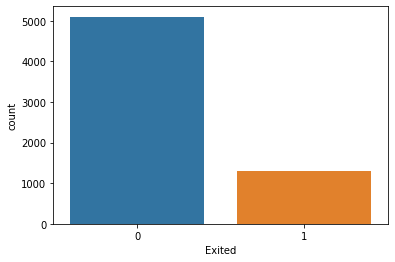

In [181]:
#Data distribution based on 'Exited' label
sns.countplot(x = 'Exited', data = train)
plt.show();

I customer con la label 'NumOfProducts' pari a 3 o 4 hanno maggiori chance di lasciare la propria banca.

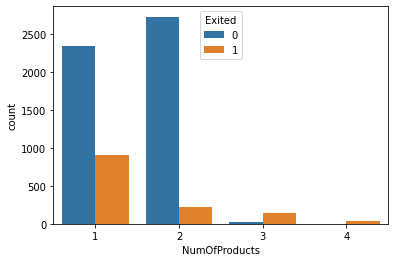

In [182]:
sns.countplot(x = "NumOfProducts", hue="Exited", data = train)
plt.show()

In [183]:
#Checking missing values on train set
missing_values_count = train.isnull().sum()
missing_values_count

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [184]:
#Checking missing values on test set
missing_values_count = test.isnull().sum()
missing_values_count

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [185]:
#Verify Dtype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exited           6400 non-null   int64  
 1   RowNumber        6400 non-null   int64  
 2   CustomerId       6400 non-null   int64  
 3   Surname          6400 non-null   object 
 4   CreditScore      6400 non-null   int64  
 5   Geography        6400 non-null   object 
 6   Gender           6400 non-null   object 
 7   Age              6400 non-null   int64  
 8   Tenure           6400 non-null   int64  
 9   Balance          6400 non-null   float64
 10  NumOfProducts    6400 non-null   int64  
 11  HasCrCard        6400 non-null   int64  
 12  IsActiveMember   6400 non-null   int64  
 13  EstimatedSalary  6400 non-null   float64
dtypes: float64(2), int64(9), object(3)
memory usage: 700.1+ KB


**Feature drop**

Scarto le feature 'Surname', 'CustomerId' e 'RowNumber' ritenute poco significative ai fini della previsione.

In [186]:
#Dropping features in training set
train = train.drop('Surname', axis=1)
train = train.drop('CustomerId', axis=1)
train = train.drop('RowNumber', axis=1)

#Dropping features in test set
test = test.drop('Surname', axis=1)
test = test.drop('CustomerId', axis=1)
test = test.drop('RowNumber', axis=1)

In [187]:
#Feature encoding
lEncoder = preprocessing.LabelEncoder()

for l in train:
   if ((l=='Geography') or (l=='Gender')):
      train[l]=lEncoder.fit_transform(train[l].astype(str))
      test[l]=lEncoder.fit_transform(test[l].astype(str))

In [188]:
#Show encoded train dataset
train

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,627,1,1,29,5,139541.58,2,1,0,80607.33
1,0,539,0,0,29,4,0.00,2,1,1,100919.19
2,0,644,1,1,34,9,112746.54,2,0,0,141230.07
3,0,619,0,0,33,2,167733.51,2,1,1,65222.48
4,0,641,2,1,31,3,153316.14,1,1,0,59927.99
...,...,...,...,...,...,...,...,...,...,...,...
6395,0,648,2,0,27,7,0.00,2,1,1,163060.43
6396,0,784,1,1,28,2,70233.74,2,1,1,179252.73
6397,0,664,0,0,34,7,93920.47,1,0,0,179913.98
6398,0,712,0,0,29,3,87375.78,2,0,0,166194.53


In [189]:
#Show encoded test dataset
test

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,604,0,1,28,7,0.00,2,0,0,58595.64
1,0,504,0,0,32,8,206663.75,1,0,0,16281.94
2,1,738,1,0,57,9,148384.64,1,0,0,155047.11
3,0,656,1,0,27,3,150905.03,2,1,0,16998.72
4,1,428,1,0,40,3,129248.11,2,1,0,72876.43
...,...,...,...,...,...,...,...,...,...,...,...
1595,0,680,0,0,47,5,0.00,2,1,1,179843.33
1596,0,832,0,0,27,10,98590.25,1,1,0,30912.89
1597,0,743,2,1,25,6,0.00,2,1,0,129740.11
1598,0,654,0,1,29,2,91955.61,1,1,0,37065.66


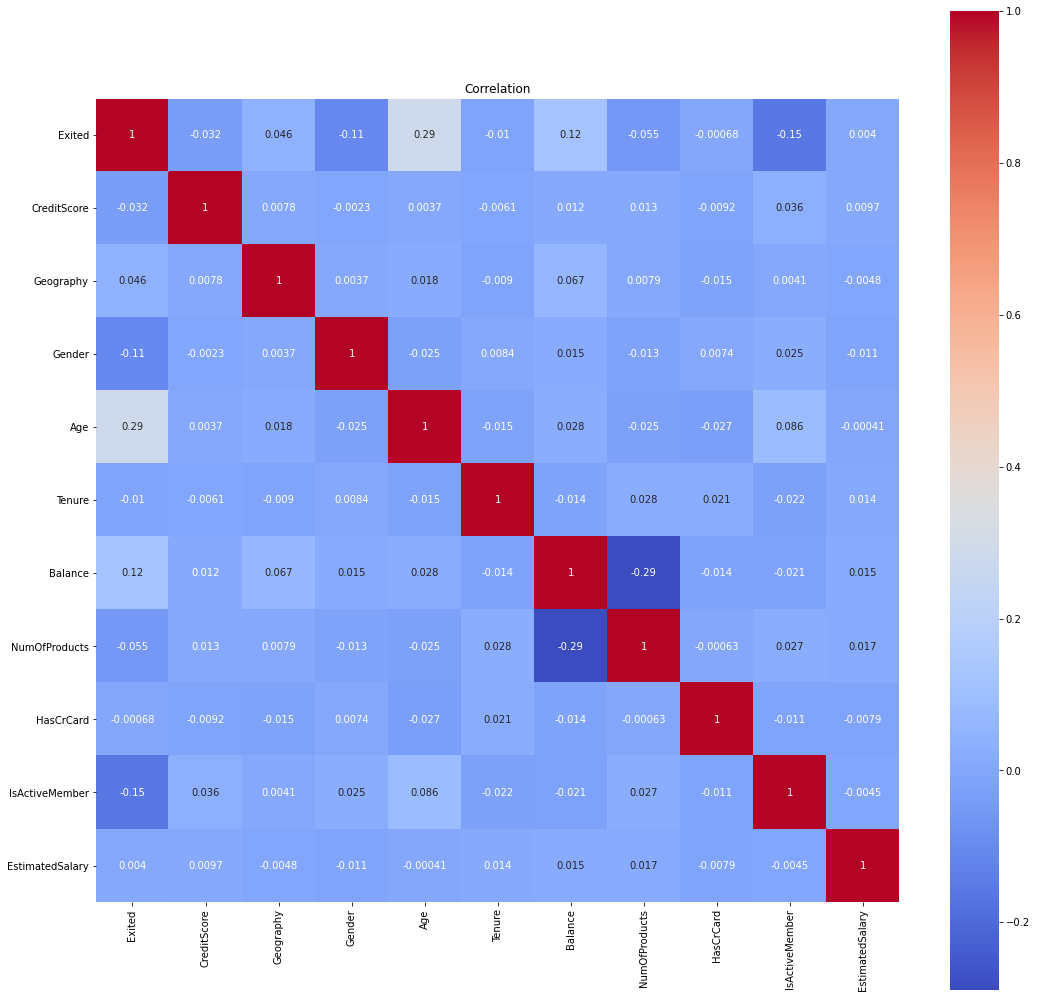

In [190]:
#Correlation Graphic on training set
correlation = train.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlation')
plt.show()

Scarto la feature 'HasCrCard' che risulta essere poco significativa dal grafico della correlazione

In [191]:
#Dropping feature in training set
train = train.drop('HasCrCard', axis=1)

#Dropping feature in test set
test = test.drop('HasCrCard', axis=1)

#Check
train

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,0,627,1,1,29,5,139541.58,2,0,80607.33
1,0,539,0,0,29,4,0.00,2,1,100919.19
2,0,644,1,1,34,9,112746.54,2,0,141230.07
3,0,619,0,0,33,2,167733.51,2,1,65222.48
4,0,641,2,1,31,3,153316.14,1,0,59927.99
...,...,...,...,...,...,...,...,...,...,...
6395,0,648,2,0,27,7,0.00,2,1,163060.43
6396,0,784,1,1,28,2,70233.74,2,1,179252.73
6397,0,664,0,0,34,7,93920.47,1,0,179913.98
6398,0,712,0,0,29,3,87375.78,2,0,166194.53


Divido la feature 'Estimated Salary' in otto fasce omogenee per verificare se ottengo dei valori di correlazione migliori.



In [192]:
#Feature division
train['EstimatedSalaryBand'] = pd.cut(train['EstimatedSalary'], 8)
train[['EstimatedSalaryBand', 'Exited']].groupby(['EstimatedSalaryBand'], as_index=False).mean().sort_values(by='EstimatedSalaryBand', ascending=True)

,EstimatedSalaryBand,Exited
0,"(-109.811, 25075.154]",0.194622
1,"(25075.154, 50060.237]",0.202632
2,"(50060.237, 75045.321]",0.221106
3,"(75045.321, 100030.405]",0.185961
4,"(100030.405, 125015.489]",0.202654
5,"(125015.489, 150000.572]",0.203182
6,"(150000.572, 174985.656]",0.214740
7,"(174985.656, 199970.74]",0.200489


In [193]:
#Value assignment
train.loc[train['EstimatedSalary'] <=  25075.154, 'EstimatedSalary'] = 0
train.loc[(train['EstimatedSalary'] > 25075.154) & (train['EstimatedSalary'] <=  50060.237), 'EstimatedSalary'] = 1
train.loc[(train['EstimatedSalary'] > 50060.237) & (train['EstimatedSalary'] <= 75045.321), 'EstimatedSalary'] = 2
train.loc[(train['EstimatedSalary'] > 75045.321) & (train['EstimatedSalary'] <= 100030.405), 'EstimatedSalary'] = 3
train.loc[(train['EstimatedSalary'] > 100030.405) & (train['EstimatedSalary'] <= 125015.489), 'EstimatedSalary'] = 4
train.loc[(train['EstimatedSalary'] > 125015.489) & (train['EstimatedSalary'] <= 150000.572), 'EstimatedSalary'] = 5
train.loc[(train['EstimatedSalary'] > 150000.572) & (train['EstimatedSalary'] <= 174985.656), 'EstimatedSalary'] = 6
train.loc[train['EstimatedSalary'] > 174985.656, 'EstimatedSalary'] = 7

test.loc[test['EstimatedSalary'] <=  25075.154, 'EstimatedSalary'] = 0
test.loc[(test['EstimatedSalary'] > 25075.154) & (test['EstimatedSalary'] <=  50060.237), 'EstimatedSalary'] = 1
test.loc[(test['EstimatedSalary'] > 50060.237) & (test['EstimatedSalary'] <= 75045.321), 'EstimatedSalary'] = 2
test.loc[(test['EstimatedSalary'] > 75045.321) & (test['EstimatedSalary'] <= 100030.405), 'EstimatedSalary'] = 3
test.loc[(test['EstimatedSalary'] > 100030.405) & (test['EstimatedSalary'] <= 125015.489), 'EstimatedSalary'] = 4
test.loc[(test['EstimatedSalary'] > 125015.489) & (test['EstimatedSalary'] <= 150000.572), 'EstimatedSalary'] = 5
test.loc[(test['EstimatedSalary'] > 150000.572) & (test['EstimatedSalary'] <= 174985.656), 'EstimatedSalary'] = 6
test.loc[test['EstimatedSalary'] > 174985.656, 'EstimatedSalary'] = 7

train = train.drop("EstimatedSalaryBand", axis = 1)

#Check
train.EstimatedSalary.unique()

array([3., 4., 5., 2., 0., 6., 1., 7.])

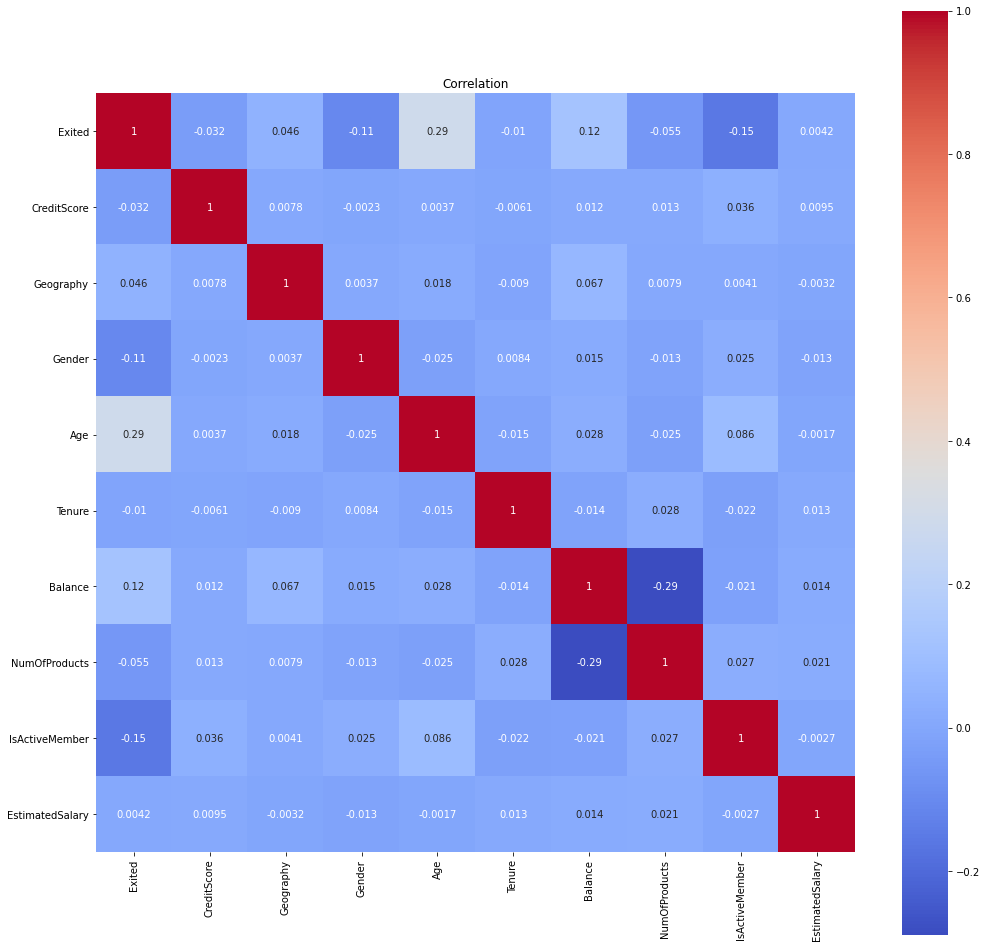

In [194]:
#Correlation Graphic on training set
correlation = train.corr()
plt.figure(figsize=(17,17))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlation')
plt.show()

La correlazione della feature 'EstimatedSalary' si è abbassata ancora di più pertanto è ragionevole scartare la feature per migliorare la qualità del sistema.

In [195]:
#Dropping feature in training set
train = train.drop('EstimatedSalary', axis=1)

#Dropping feature in test set
test = test.drop('EstimatedSalary', axis=1)

#Check
train

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,0,627,1,1,29,5,139541.58,2,0
1,0,539,0,0,29,4,0.00,2,1
2,0,644,1,1,34,9,112746.54,2,0
3,0,619,0,0,33,2,167733.51,2,1
4,0,641,2,1,31,3,153316.14,1,0
...,...,...,...,...,...,...,...,...,...
6395,0,648,2,0,27,7,0.00,2,1
6396,0,784,1,1,28,2,70233.74,2,1
6397,0,664,0,0,34,7,93920.47,1,0
6398,0,712,0,0,29,3,87375.78,2,0


Raggruppo la feature 'Age' in fasce sulla base della sua distribuzione rispetto alla label 'Exited'

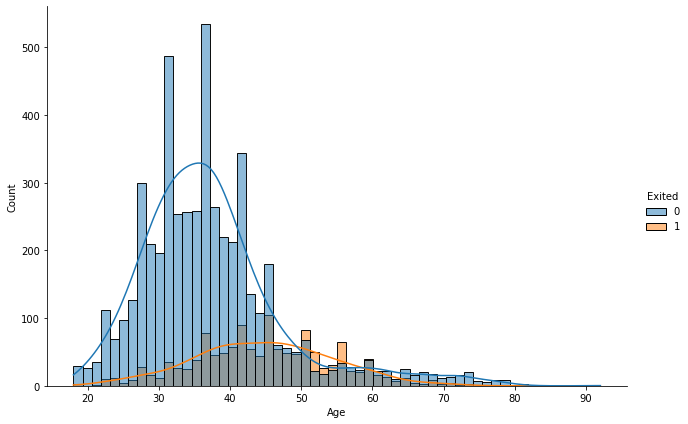

In [196]:
sns.displot(data=train, x="Age", hue="Exited",  height=6, aspect=1.5, kde = True)

In [197]:
#Value assignment
train.loc[train['Age'] <=  30, 'Age'] = 0
train.loc[(train['Age'] > 30) & (train['Age'] <=  40), 'Age'] = 1
train.loc[(train['Age'] > 40) & (train['Age'] <=  50), 'Age'] = 2
train.loc[(train['Age'] > 50) & (train['Age'] <=  60), 'Age'] = 3
train.loc[train['Age'] > 60, 'Age'] = 4

test.loc[test['Age'] <=  30, 'Age'] = 0
test.loc[(test['Age'] > 30) & (test['Age'] <=  40), 'Age'] = 1
test.loc[(test['Age'] > 40) & (test['Age'] <=  50), 'Age'] = 2
test.loc[(test['Age'] > 50) & (test['Age'] <=  60), 'Age'] = 3
test.loc[test['Age'] > 60, 'Age'] = 4

#Check
train.Age.unique()

array([0, 1, 2, 4, 3])

La correlazione della feature 'Age' non ha avuto variazioni significative perciò l'aggregazione risulta superflua.

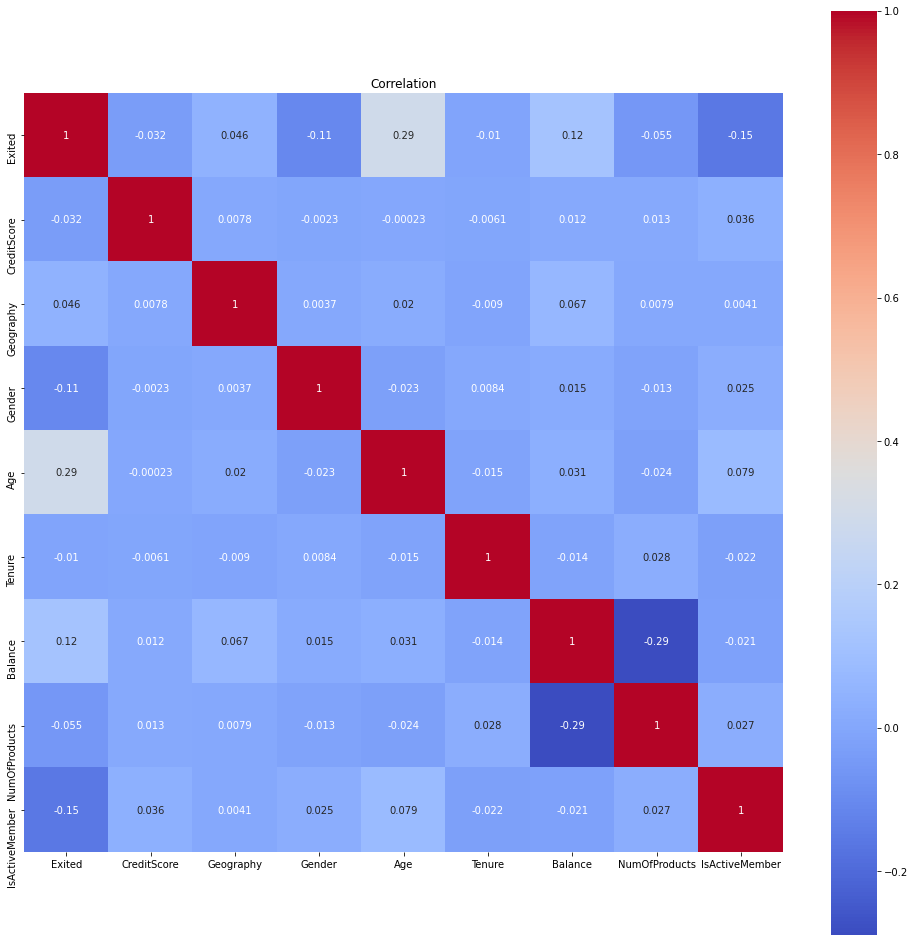

In [198]:
#Correlation Graphic on training set
correlation = train.corr()
plt.figure(figsize=(17,17))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlation')
plt.show()

Divido la label 'Exited' dal training set e test set per applicare l'algoritmo di ML.

In [199]:
#Divide
trainY=train['Exited']
testY=test['Exited']
trainX=train.drop('Exited', axis=1)
testX=test.drop('Exited', axis=1)

Applico il modello RandomForestClassifier che calcola una moltitudine di Decision Trees e tramite la media dei risultati ottenuti fa la previsione.

In [200]:
#Model training and score
forest = RandomForestClassifier()
forest.fit(trainX, trainY)
prediction = forest.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 85.25 %
